In [408]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.10.0


In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

In [5]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [6]:
signal_df = pd.read_csv('Signal.csv')

In [7]:
signal_df.sample(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
290,8.7000000,0.5200000,0.0900000,2.5000000,0.0910000,20.0000000,49.0000000,0.9976000,3.3400000,0.8600000,10.6000000,7
1133,7.2000000,0.4800000,0.0700000,5.5000000,0.0890000,10.0000000,18.0000000,0.9968400,3.3700000,0.6800000,11.2000000,7
707,7.4000000,0.4900000,0.1900000,3.0000000,0.0770000,16.0000000,37.0000000,0.9966000,3.3700000,0.5100000,10.5000000,5
1588,7.2000000,0.6600000,0.3300000,2.5000000,0.0680000,34.0000000,102.0000000,0.9941400,3.2700000,0.7800000,12.8000000,6
847,7.4000000,0.6800000,0.1600000,1.8000000,0.0780000,12.0000000,39.0000000,0.9977000,3.5000000,0.7000000,9.9000000,6


In [8]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### There are 11 parameters describing signal strength, which is the target label. All features are numeric and there are 1599 data samples

In [9]:
signal_df.isnull().sum()/signal_df.shape[0]*100

Parameter 1       0.0000000
Parameter 2       0.0000000
Parameter 3       0.0000000
Parameter 4       0.0000000
Parameter 5       0.0000000
Parameter 6       0.0000000
Parameter 7       0.0000000
Parameter 8       0.0000000
Parameter 9       0.0000000
Parameter 10      0.0000000
Parameter 11      0.0000000
Signal_Strength   0.0000000
dtype: float64

In [10]:
len(signal_df[signal_df.duplicated()])

240

In [11]:
signal_df = signal_df.drop_duplicates()

In [12]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


#### There were no missing values but 240 duplicates were dropped from the database

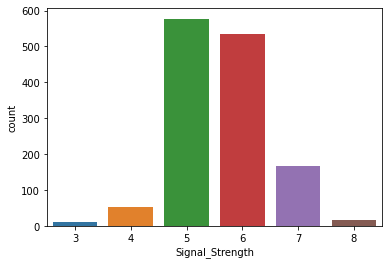

In [13]:
sns.countplot(signal_df['Signal_Strength'])
plt.show()

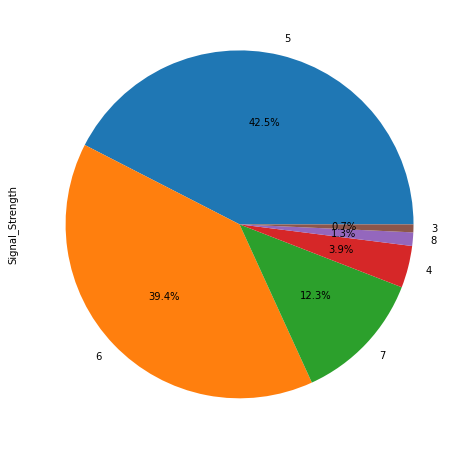

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
signal_df['Signal_Strength'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

#### There are 6 different signal strengths present in the dataset ranging from 3-8. 5 and 6 have the most frequency amongst them at 42.5% and 39.4%, followed by a strength of 7 at 12.3%.

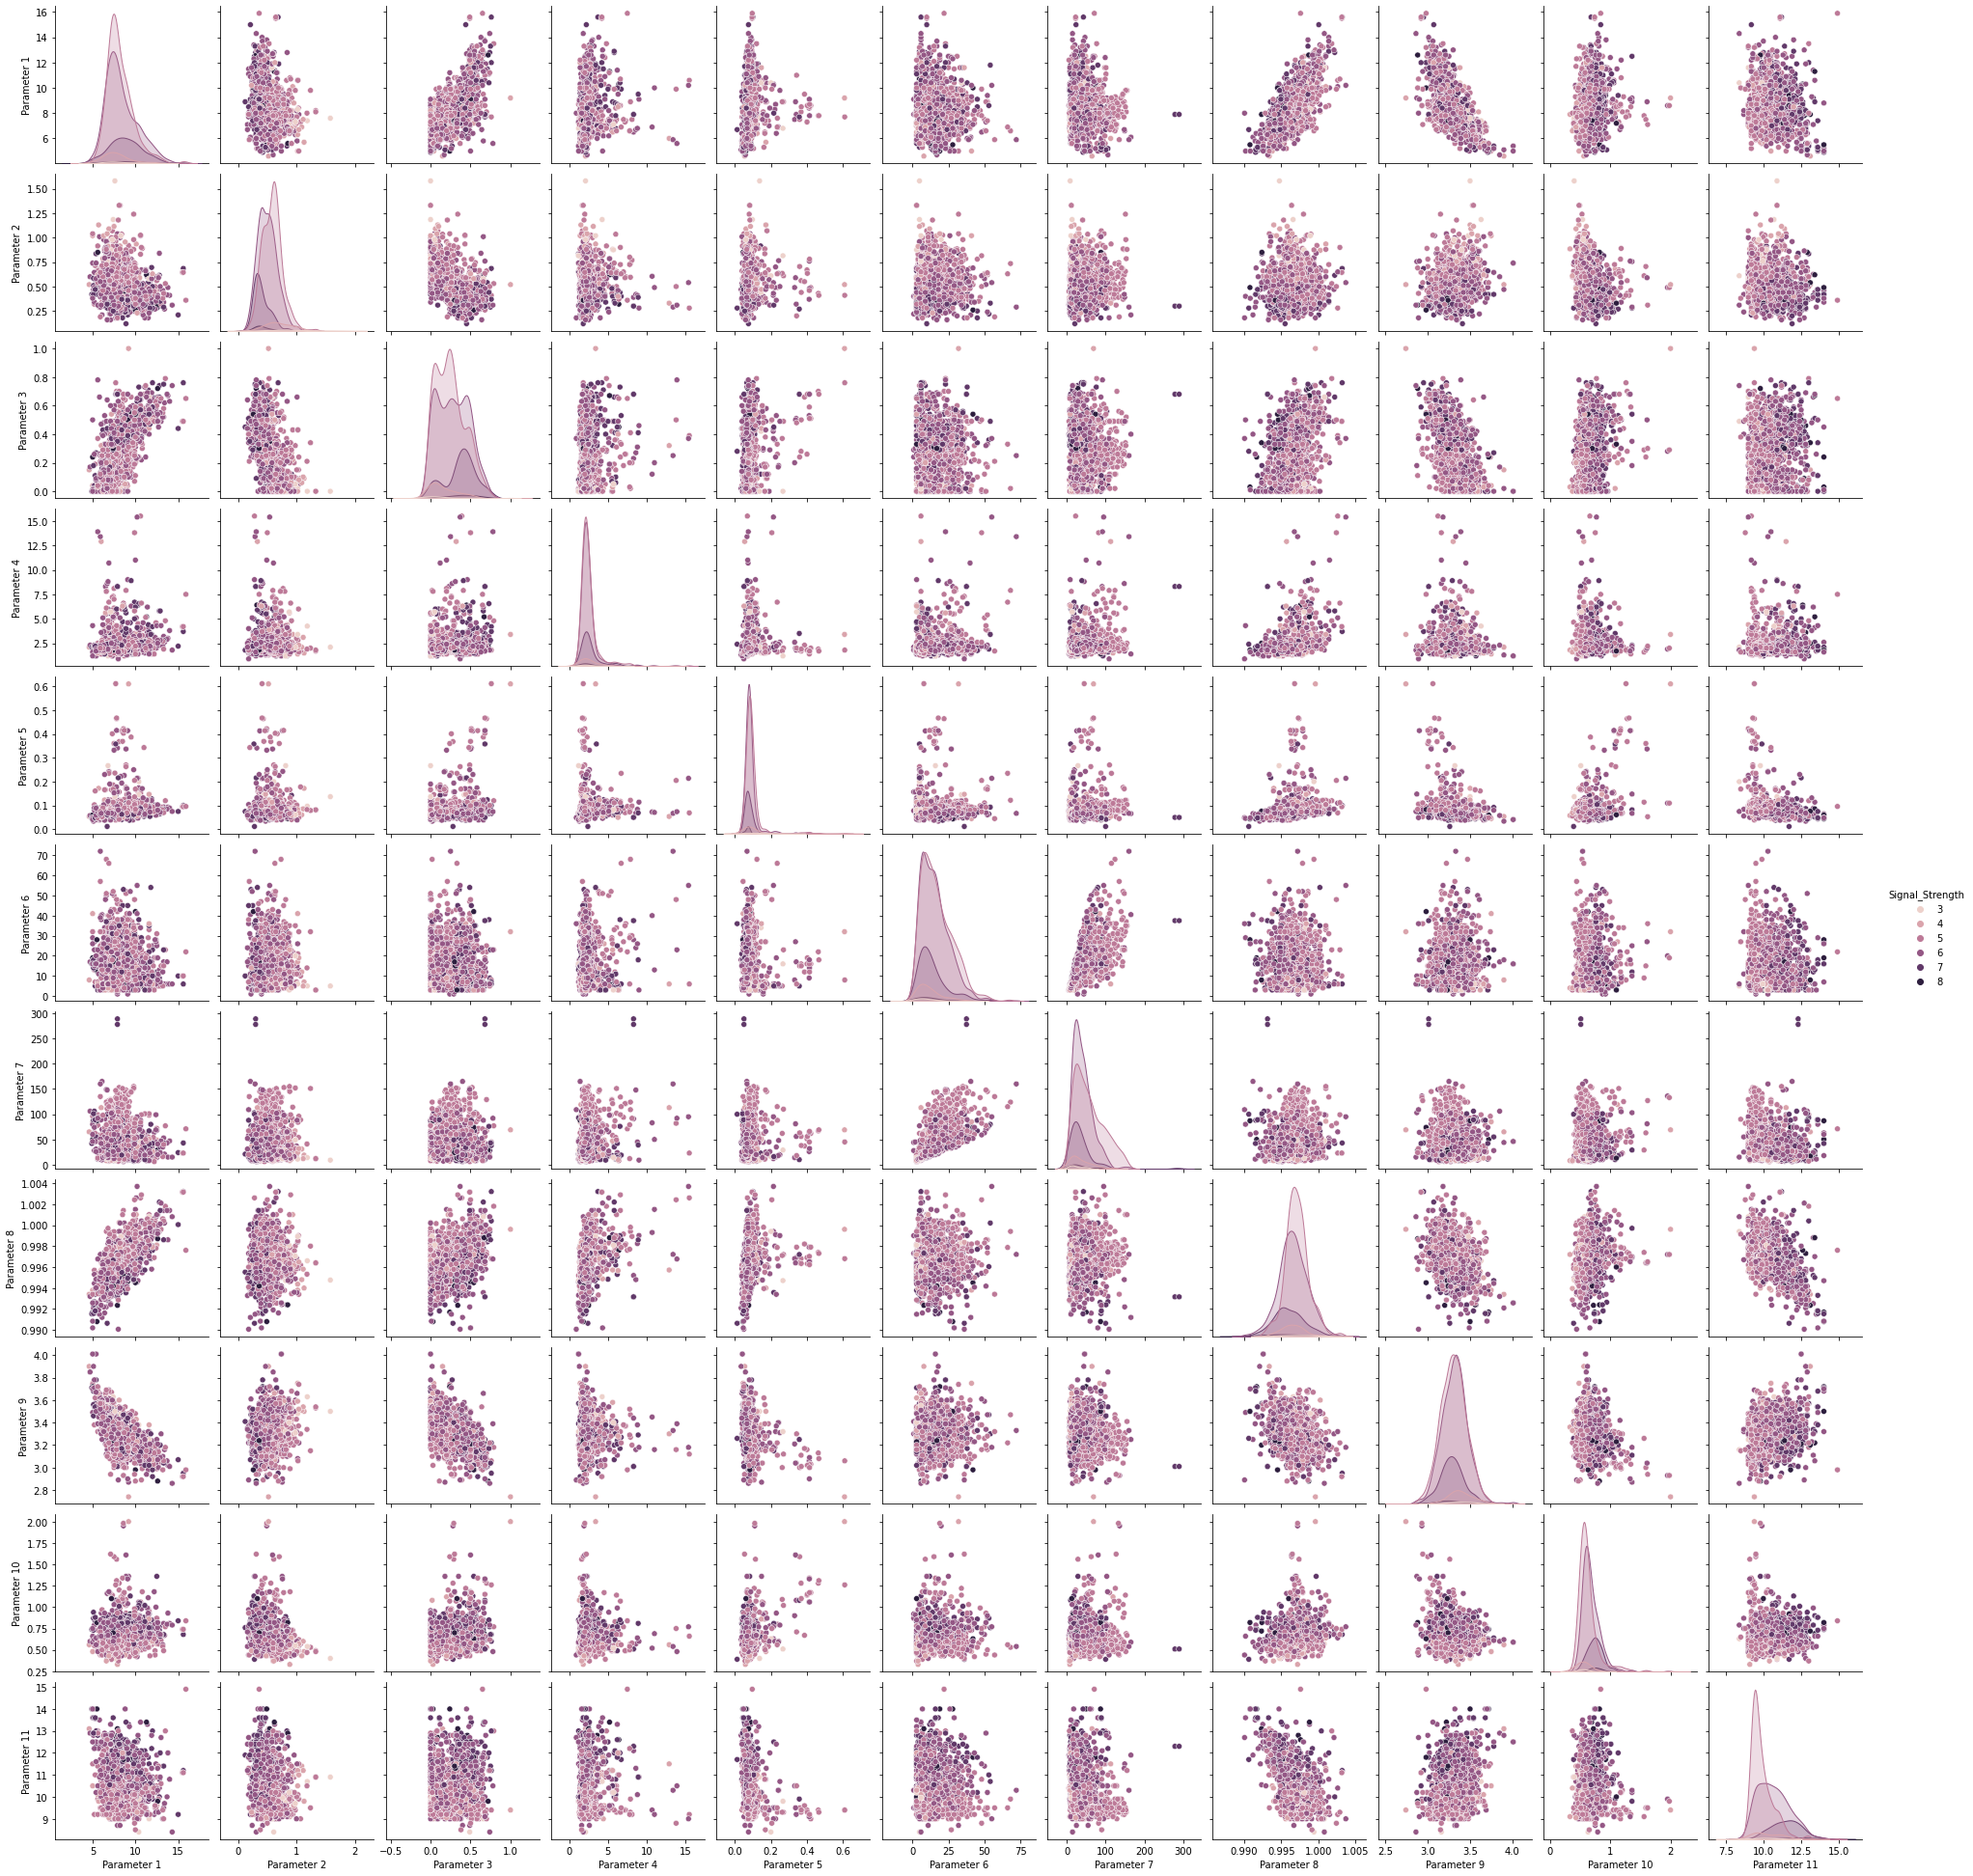

In [22]:
sns.pairplot(signal_df,hue='Signal_Strength')

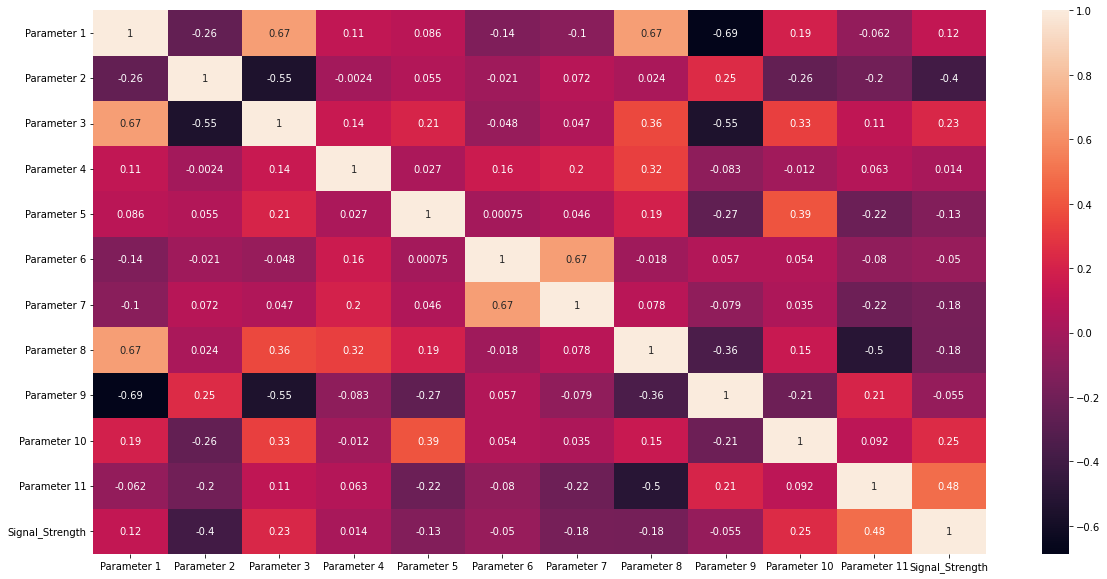

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(signal_df.corr(),annot=True)
plt.show()

#### From the above plots we can infer that Parameter 11 is highly positively corellated with Signal Strength, and Parameter 2 is negatively corellated. Parameter 3 and 10 are also slightly corellated to the strength of signal.

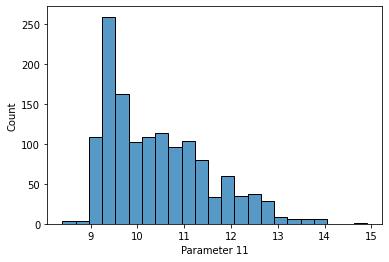

In [451]:
sns.histplot(signal_df['Parameter 11'])
plt.show()

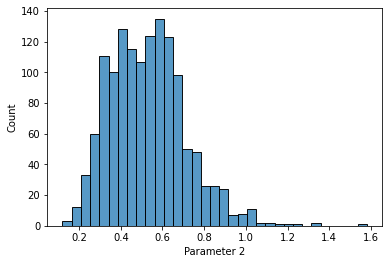

In [452]:
sns.histplot(signal_df['Parameter 2'])
plt.show()

#### Analysing the 2 most highly corellated parameters, we can see that for Parameter 11, the data is slightly skewed to the right with most of the values lying between 9 and 10, while for Parameter 2 the data seems to be normally distributed with 2 peaks at 0.4 and 0.6

In [16]:
dfc =  signal_df.copy()

In [17]:
dfc.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4000000,0.7000000,0.0000000,1.9000000,0.0760000,11.0000000,34.0000000,0.9978000,3.5100000,0.5600000,9.4000000,5
1,7.8000000,0.8800000,0.0000000,2.6000000,0.0980000,25.0000000,67.0000000,0.9968000,3.2000000,0.6800000,9.8000000,5
2,7.8000000,0.7600000,0.0400000,2.3000000,0.0920000,15.0000000,54.0000000,0.9970000,3.2600000,0.6500000,9.8000000,5
3,11.2000000,0.2800000,0.5600000,1.9000000,0.0750000,17.0000000,60.0000000,0.9980000,3.1600000,0.5800000,9.8000000,6
5,7.4000000,0.6600000,0.0000000,1.8000000,0.0750000,13.0000000,40.0000000,0.9978000,3.5100000,0.5600000,9.4000000,5


In [480]:
y = dfc['Signal_Strength'] # save target column to a variable called 'Labels'
X = dfc.drop(['Signal_Strength'], axis = 1) # drops target column

In [481]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: Signal_Strength, dtype: int64

In [482]:
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4000000,0.7000000,0.0000000,1.9000000,0.0760000,11.0000000,34.0000000,0.9978000,3.5100000,0.5600000,9.4000000
1,7.8000000,0.8800000,0.0000000,2.6000000,0.0980000,25.0000000,67.0000000,0.9968000,3.2000000,0.6800000,9.8000000
2,7.8000000,0.7600000,0.0400000,2.3000000,0.0920000,15.0000000,54.0000000,0.9970000,3.2600000,0.6500000,9.8000000
3,11.2000000,0.2800000,0.5600000,1.9000000,0.0750000,17.0000000,60.0000000,0.9980000,3.1600000,0.5800000,9.8000000
5,7.4000000,0.6600000,0.0000000,1.8000000,0.0750000,13.0000000,40.0000000,0.9978000,3.5100000,0.5600000,9.4000000


In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state =42)

In [484]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((951, 11), (408, 11), (951,), (408,))

In [485]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [486]:
X_train_sc.shape, X_test_sc.shape, y_train.shape, y_test.shape

((951, 11), (408, 11), (951,), (408,))

In [487]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [488]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [489]:
model = Sequential([Input(shape=(11,)), 
                   Dense(512, activation='relu'), 
                   Dense(128, activation='relu'),
                   Dense(9, activation='sigmoid')])

In [490]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01), metrics = ['accuracy'])

In [491]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 512)               6144      
                                                                 
 dense_150 (Dense)           (None, 128)               65664     
                                                                 
 dense_151 (Dense)           (None, 9)                 1161      
                                                                 
Total params: 72,969
Trainable params: 72,969
Non-trainable params: 0
_________________________________________________________________


In [492]:
train = model.fit(X_train_sc, y_train, validation_data=(X_test_sc,y_test), epochs=40,batch_size=100)

Epoch 1/40
10/10 [==============================] - 1s 34ms/step - loss: 1.2956 - accuracy: 0.4858 - val_loss: 1.0589 - val_accuracy: 0.5833
Epoch 2/40
10/10 [==============================] - 0s 10ms/step - loss: 1.0674 - accuracy: 0.5584 - val_loss: 0.9834 - val_accuracy: 0.5760
Epoch 3/40
10/10 [==============================] - 0s 9ms/step - loss: 0.9512 - accuracy: 0.6036 - val_loss: 0.9552 - val_accuracy: 0.6152
Epoch 4/40
10/10 [==============================] - 0s 10ms/step - loss: 0.8967 - accuracy: 0.6330 - val_loss: 1.0318 - val_accuracy: 0.5319
Epoch 5/40
10/10 [==============================] - 0s 9ms/step - loss: 0.9100 - accuracy: 0.6015 - val_loss: 1.1266 - val_accuracy: 0.5098
Epoch 6/40
10/10 [==============================] - 0s 9ms/step - loss: 0.9076 - accuracy: 0.5952 - val_loss: 0.9880 - val_accuracy: 0.5882
Epoch 7/40
10/10 [==============================] - 0s 9ms/step - loss: 0.8503 - accuracy: 0.6309 - val_loss: 1.0348 - val_accuracy: 0.5686
Epoch 8/40
10/10 

In [493]:
y_pred = model.predict(X_test_sc)

13/13 [==============================] - 0s 2ms/step


In [494]:
y_train.shape

(951, 9)

In [495]:
y_test.shape

(408, 9)

In [496]:
y_pred.shape

(408, 9)

In [497]:
scores = model.evaluate(X_test_sc, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 2.5771288871765137
Accuracy: 0.529411792755127


In [498]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
print("Test Classification Report",classification_report(y_test,y_pred))

Test Classification Report               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.65      0.65      0.65       172
           6       0.51      0.51      0.51       164
           7       0.37      0.42      0.39        50
           8       0.00      0.00      0.00         4

    accuracy                           0.53       408
   macro avg       0.25      0.26      0.26       408
weighted avg       0.52      0.53      0.52       408



Text(0.5, 1.0, 'Training and validation loss')

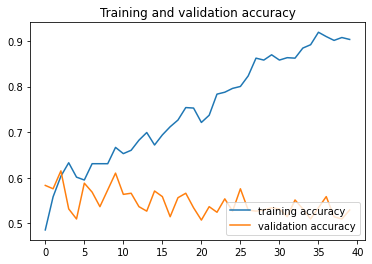

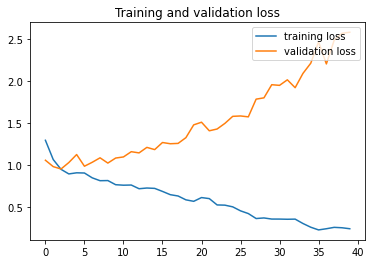

In [499]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

In [500]:
y2 = dfc['Signal_Strength'] # save target column to a variable called 'Labels'
X2 = dfc.drop(['Signal_Strength'], axis = 1) # drops target column

In [501]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , test_size = 0.3, random_state =42)

In [502]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((951, 11), (408, 11), (951,), (408,))

In [503]:
sc = StandardScaler()

X2_train_sc = sc.fit_transform(X2_train)
X2_test_sc = sc.transform(X2_test)

In [504]:
X2_train_sc.shape, X2_test_sc.shape, y2_train.shape, y2_test.shape

((951, 11), (408, 11), (951,), (408,))

In [505]:
y2_train = to_categorical(y2_train)
y2_test = to_categorical(y2_test)

In [506]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [525]:
model2 = Sequential([Input(shape=(11,)), 
                   Dense(1024, activation='relu'),
                   Dense(512, activation='relu'),
                   Dense(128, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(9, activation='softmax')])

In [526]:
model2.compile(loss='mse',
              optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [527]:
model2.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 1024)              12288     
                                                                 
 dense_169 (Dense)           (None, 512)               524800    
                                                                 
 dense_170 (Dense)           (None, 128)               65664     
                                                                 
 dense_171 (Dense)           (None, 64)                8256      
                                                                 
 dense_172 (Dense)           (None, 9)                 585       
                                                                 
Total params: 611,593
Trainable params: 611,593
Non-trainable params: 0
_________________________________________________________________


In [528]:
train2 = model2.fit(X2_train_sc, y2_train, validation_data=(X2_test_sc,y2_test), epochs=30,batch_size=100)

Epoch 1/30
10/10 [==============================] - 1s 46ms/step - loss: 0.0949 - accuracy: 0.4826 - val_loss: 0.0910 - val_accuracy: 0.5392
Epoch 2/30
10/10 [==============================] - 0s 24ms/step - loss: 0.0879 - accuracy: 0.5247 - val_loss: 0.0826 - val_accuracy: 0.5417
Epoch 3/30
10/10 [==============================] - 0s 21ms/step - loss: 0.0793 - accuracy: 0.5163 - val_loss: 0.0737 - val_accuracy: 0.5515
Epoch 4/30
10/10 [==============================] - 0s 19ms/step - loss: 0.0713 - accuracy: 0.5468 - val_loss: 0.0674 - val_accuracy: 0.5735
Epoch 5/30
10/10 [==============================] - 0s 22ms/step - loss: 0.0667 - accuracy: 0.5605 - val_loss: 0.0645 - val_accuracy: 0.5735
Epoch 6/30
10/10 [==============================] - 0s 20ms/step - loss: 0.0647 - accuracy: 0.5720 - val_loss: 0.0632 - val_accuracy: 0.5760
Epoch 7/30
10/10 [==============================] - 0s 21ms/step - loss: 0.0633 - accuracy: 0.5752 - val_loss: 0.0622 - val_accuracy: 0.5809
Epoch 8/30
10

In [529]:
y2_pred = model2.predict(X2_test_sc)

13/13 [==============================] - 0s 4ms/step


In [530]:
scores = model2.evaluate(X2_test_sc, y2_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.059134021401405334
Accuracy: 0.6299019455909729


In [531]:
y2_pred=np.argmax(y2_pred, axis=1)
y2_test=np.argmax(y2_test, axis=1)
print("Test Classification Report",classification_report(y2_test,y2_pred))

Test Classification Report               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.69      0.74      0.72       172
           6       0.58      0.65      0.61       164
           7       0.59      0.44      0.51        50
           8       0.00      0.00      0.00         4

    accuracy                           0.63       408
   macro avg       0.31      0.31      0.31       408
weighted avg       0.60      0.63      0.61       408



Text(0.5, 1.0, 'Training and validation loss')

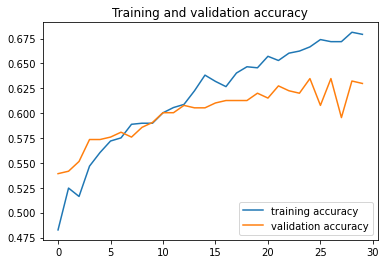

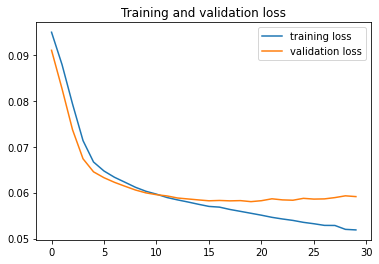

In [532]:
accuracy = train2.history['accuracy']
val_accuracy = train2.history['val_accuracy']
loss = train2.history['loss']
val_loss = train2.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

In [475]:
model3 = Sequential([Input(shape=(11,)), 
                   Dense(64, activation='relu'),
                   Dense(9, activation='sigmoid')])

In [476]:
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [477]:
train3 = model3.fit(X2_train_sc, y2_train, validation_data=(X2_test_sc,y2_test), epochs=30,batch_size=100)

Epoch 1/30
10/10 [==============================] - 1s 31ms/step - loss: 2.2413 - accuracy: 0.0978 - val_loss: 2.1045 - val_accuracy: 0.1593
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 1.9985 - accuracy: 0.2766 - val_loss: 1.8736 - val_accuracy: 0.3652
Epoch 3/30
10/10 [==============================] - 0s 8ms/step - loss: 1.7910 - accuracy: 0.4311 - val_loss: 1.6808 - val_accuracy: 0.4926
Epoch 4/30
10/10 [==============================] - 0s 8ms/step - loss: 1.6183 - accuracy: 0.5110 - val_loss: 1.5221 - val_accuracy: 0.5294
Epoch 5/30
10/10 [==============================] - 0s 7ms/step - loss: 1.4794 - accuracy: 0.5468 - val_loss: 1.3945 - val_accuracy: 0.5368
Epoch 6/30
10/10 [==============================] - 0s 8ms/step - loss: 1.3715 - accuracy: 0.5510 - val_loss: 1.2938 - val_accuracy: 0.5441
Epoch 7/30
10/10 [==============================] - 0s 8ms/step - loss: 1.2874 - accuracy: 0.5584 - val_loss: 1.2194 - val_accuracy: 0.5564
Epoch 8/30
10/10 [=

In [478]:
scores = model3.evaluate(X2_test_sc, y2_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.976407527923584
Accuracy: 0.5906862616539001


Text(0.5, 1.0, 'Training and validation loss')

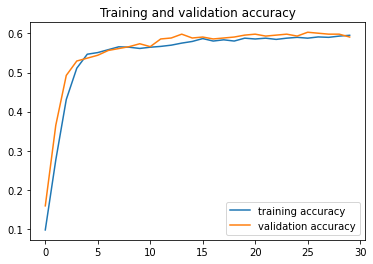

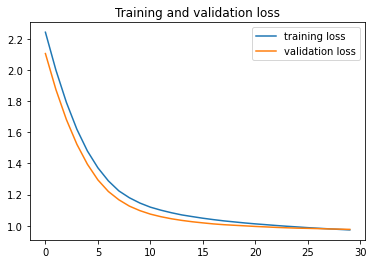

In [479]:
accuracy = train3.history['accuracy']
val_accuracy = train3.history['val_accuracy']
loss = train3.history['loss']
val_loss = train3.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

## Observations
### Base Model
In the base model I used 2 hidden layers with relu activation and 9 class output layer for output with sigmoid activation. 
For the hyperparameters I used Adam optimiser with 0.01 learning rate, and categorical crossentropy loss function.
I got a very high validation loss and the model was overfitting with 90% accuracy on train data and only 53% accuracy on val data, which was fluctuating alot.
### Updated Models
I updated the base model in 2 different ways to see what different architectures and hyperparameters do
#### Model 2
In model 2 I used 4 hidden layers with relu activation and 9 class output layer for output with softmax activation. 
For the hyperparameters I used Adam optimiser with a lowered 0.0001 learning rate, and mean squared error loss function.
Here, validation loss was very low at 0.06 and the model was no longer overfitting, with lower 68% accuracy on train data, but accuracy on val data increased by 10%.
#### Model 3
In model 3 I used 1 hidden layer with relu activation and 9 class output layer for output with sigmoid activation. 
For the hyperparameters I used Adam optimiser with 0.001 learning rate, and categorical crossentropy loss function.
Here, validation loss was lower than base model but higher than model 2 at 0.97 with 59% accuracy on both train and val data.

## Conclusions
By adding more hidden layers and trying different hyperparameters, loss decreased significantly and accuracy increased quite a bit, also model was no longer overfitting. Keeping minimum hidden layers also increased the accuracy by a bit but the loss was still high. From this we can conclude by optimising the hyperparameters we can increase the accuracy of the model without changing much of the architecture.